# Student Details

Name: Bhupen Tuladhar

Student Id: 2329751

Group: L5CG9

Module Leader: Mr.Siman Giri

# Linear Regression Fish Weight Prediction



In [1]:
# Importing drive from Google colab library
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing necessary libraries
#Importing numpy for numeric operation
import numpy as np
#Importing matplotlib.pyplot i.e. collection of command style functions that make matplotlib work
import matplotlib.pyplot as plt
#Importing Seaborn a Python data visualization library built on top of Matplotlib
import seaborn as sns
#Importing pandas an open source data analysis library built on top of the Python programming language
import pandas as pd

#Importing sklearn
import sklearn

In [3]:
#Reading the csv file
data = pd.read_csv("/content/drive/MyDrive/dataset/Fish.csv")

# Data Cleaning and Understanding

In [4]:
# head() gives first five data
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340



1. Data contains information about the body structure of different fish species.
2. Species names are listed in the first column.
3. Fish weight is in the second column, which is the variable that depends on other factors.
4. ength1, Length2, and Length3 columns represent vertical, diagonal, and cross lengths respectively.
5. Second last and last columns contain height and width data of fish.
6. The weight of fish depends on its various lengths, widths, and heights.
7. The second column (weight) is the dependent variable, while others are independent.
8. There are records of 7 fish species in the data.
9. The main aim is to estimate fish weight based on its body measurements.
10. This data collection provides statistical insights into different fish species.

In [5]:
# tail() gives last five data
data.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [6]:
# Get no of rows and columns
data.shape

(159, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [8]:
# Description of data
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [9]:
#isnull to check if any null value is present in dataset
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [10]:
#duplicated to check if any duplicate value is present in dataset
data.duplicated().sum()

0

In [11]:
# Gets count for each species
data.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [12]:
# Creating dataframe for species for better visualization
data_sp = data.Species.value_counts()
data_sp = pd.DataFrame(data_sp)
data_sp.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


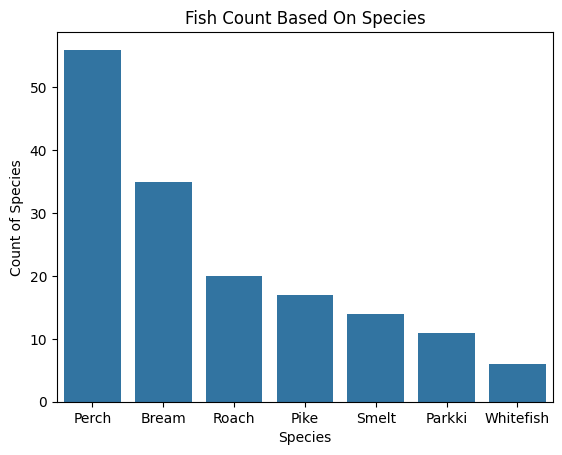

In [13]:
# df_sp.index will returns row labels of dataframe
sns.barplot(x= data_sp.index, y = data_sp.Species)
plt.xlabel('Species')
plt.ylabel('Count of Species')
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Fish Count Based On Species')
plt.show()


Our dataset is quite limited, containing only a small number of training examples, specifically six for the 'Whitefish' species.

Due to the scarcity of data, we will not consider the different species during our analysis.

In [14]:
# Filter the DataFrame to include only rows where the weight is less than or equal to zero
data[data.Weight <= 0]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


Drop the data at row 40 since the weight is 0.

In [15]:
# Dropping row 40
data1 = data.drop([40])
print('New dimension of dataset is= ', data1.shape)
data1.head(5)

New dimension of dataset is=  (158, 7)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [16]:
# Checking correclation between variables considering only numeric columns
data1.corr(numeric_only=True)

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915719,0.918603,0.923090,0.723857,0.886654
Length1,0.915719,1.000000,0.999516,0.992004,0.624409,0.866684
Length2,0.918603,0.999516,1.000000,0.994083,0.639503,0.873201
Length3,0.923090,0.992004,0.994083,1.000000,0.702655,0.878189
Height,0.723857,0.624409,0.639503,0.702655,1.000000,0.792401
Width,0.886654,0.866684,0.873201,0.878189,0.792401,1.000000


<ipython-input-17-8916a947d6f3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr(), annot =True)


Text(0.5, 1.0, 'Correlation Matrix')

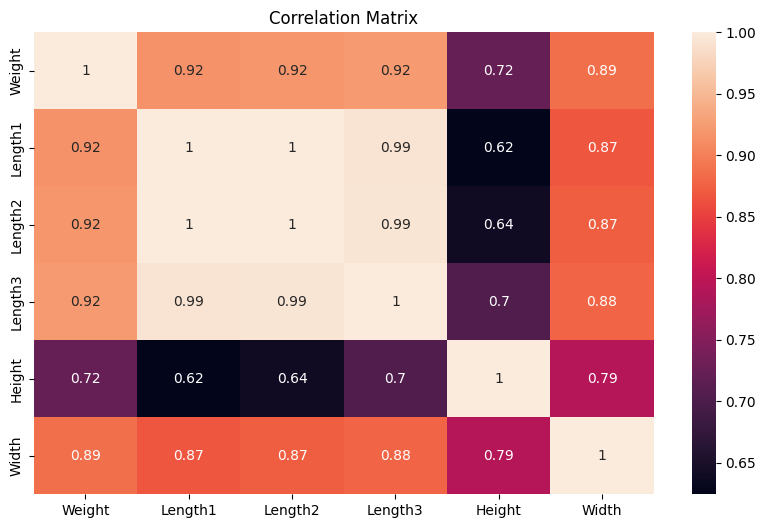

In [17]:
plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(data1.corr(), annot =True)
plt.title('Correlation Matrix')

1. Correlation coefficient range from -1 to +1
2. +1.00 means perfect positive relationship
3. 0.00 means no relationship
4. -1.00 means perfect negative relationship
5. The correlation between 'Length1', 'Length2' and 'Length3' is almost 1. This will cause 'Multicolinearity' and if we don't take care of it, it may lead to unreliable predictions.

Therefore we are dropping those 3 columns

In [18]:
data2 = data1.drop(['Length1', 'Length2', 'Length3'], axis = 'columns')
print('New dimension of dataset is= ', data2.shape)
data2.head()

New dimension of dataset is=  (158, 4)


,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340


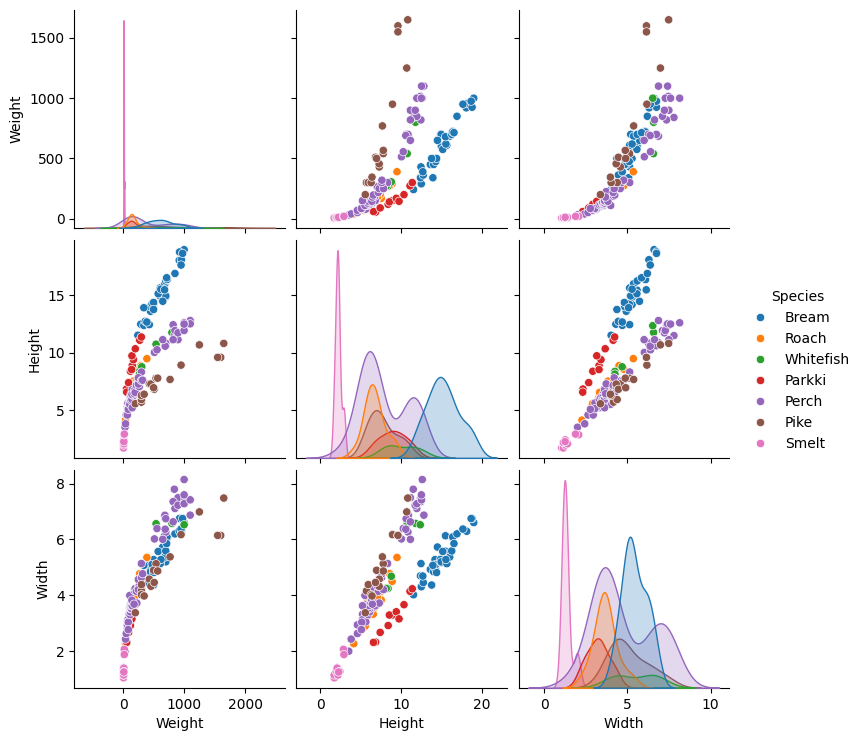

In [19]:
# Plot pairwise relationships in a dataset with different species distinguished by color
sns.pairplot(data2, kind='scatter', hue='Species')


From the above pair plot, we can see that there seems to be some correlations between Height, Width and the Weight.

Now, since we have the final dataset ready lets analyze and remove the outliers.


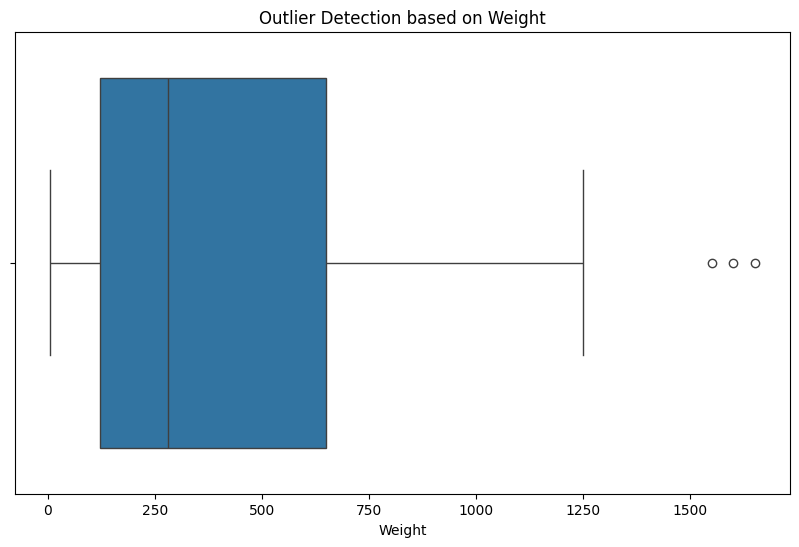

In [20]:
# Create a box plot to visualize the distribution of weights
sns.boxplot(x=data2['Weight'])

# Add title to the plot
plt.title('Outlier Detection based on Weight')

# Display the plot
plt.show()

We can see there are three outliers. Lets create a function to find the index of the outliers.

In [21]:
# Define a function for outlier detection
def outlier_detection(dataframe):
    # Calculate the first quartile (Q1)
    Q1 = dataframe.quantile(0.25)
    # Calculate the third quartile (Q3)
    Q3 = dataframe.quantile(0.75)
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    # Calculate the upper end of the range
    upper_end = Q3 + 1.5 * IQR
    # Calculate the lower end of the range
    lower_end = Q1 - 1.5 * IQR
    # Identify outliers based on the defined range
    outlier = dataframe[(dataframe > upper_end) | (dataframe < lower_end)]
    return outlier

outlier_detection(data2['Weight'])


142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

Index 142, 143 and 144 are outliers.
Now lets check on remaining columns

Text(0.5, 1.0, 'Outlier Detection based on Height')

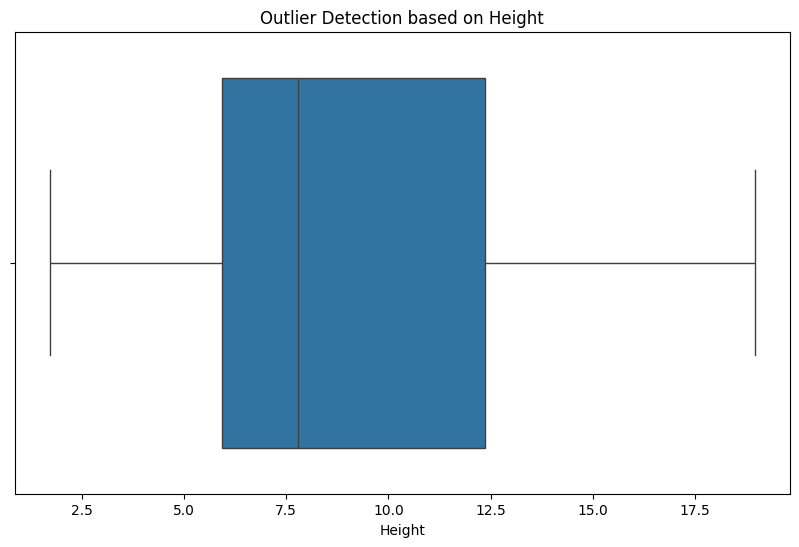

In [22]:
# Create a box plot to visualize the distribution of height
sns.boxplot(x =data2['Height'])
plt.title('Outlier Detection based on Height')

Text(0.5, 1.0, 'Outlier Detection based on Height')

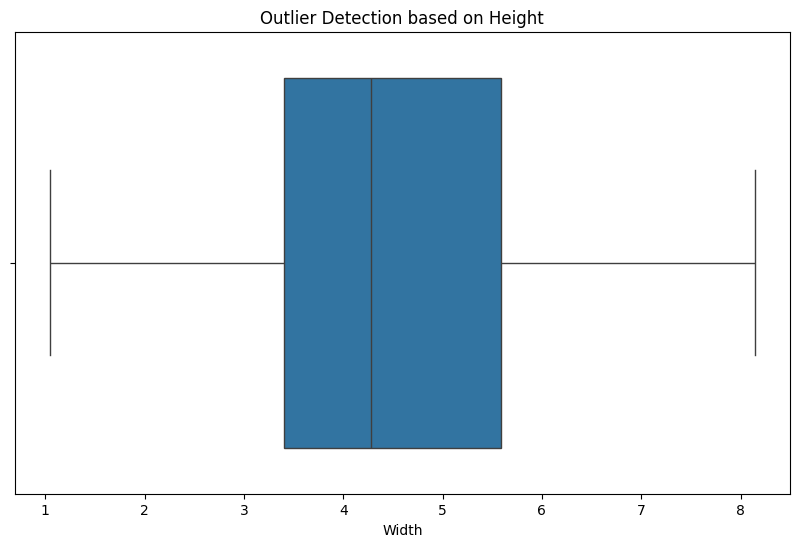

In [23]:
# Create a box plot to visualize the distribution of Width
sns.boxplot(x =data2['Width'])
plt.title('Outlier Detection based on Height')

Since, there were no outliers on width and height, we dont need to create a outlier detection function

In [24]:
# Dropping the outliers
data3 = data2.drop([142,143,144])
data3.shape

(155, 4)

In [25]:
data3.describe()

,Weight,Height,Width
count,155.000000,155.000000,155.000000
mean,377.638065,8.967102,4.382326
std,319.144511,4.333722,1.675564
min,5.900000,1.728400,1.047600
25%,120.000000,5.926950,3.385650
50%,272.000000,7.680000,4.247600
75%,615.000000,12.379300,5.472750
max,1250.000000,18.957000,8.142000


# Primary Model


In [26]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = data3[['Height','Width']]
y = data3[['Weight']]

#Performing train-test split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)

print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (124, 2)
X_test dimension=  (31, 2)
y_train dimension=  (124, 1)
y_train dimension=  (31, 1)


# Using Ordinary Least Squares Model

In [27]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train,y_train)

print('coef= ', model.coef_) # Since we have two features(Height and Width), there will be 2 coef
print('intercept= ', model.intercept_)
print('score= ', model.score(X_test,y_test))

coef=  [[ 10.40686081 151.73209963]]
intercept=  [-386.16761436]
score=  0.8960229976573091


In [28]:
predictedWeight = pd.DataFrame(model.predict(X_test), columns=['Predicted Weight']) # Create new dataframe of column'Predicted Weight'
actualWeight = pd.DataFrame(y_test)
actualWeight = actualWeight.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualWeight,predictedWeight],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Weight,110.000000,7.500000,955.000000,1000.0000,850.000000,55.000000,150.000000,10.000000,19.700000,200.000000,...,500.000000,500.000000,700.000000,273.000000,430.000000,225.000000,140.000000,120.000000,130.000000,1000.000000
Predicted Weight,212.481055,-189.636049,756.728427,813.0023,816.240658,38.098095,218.321182,-168.334196,-42.610188,277.385406,...,419.788276,514.386807,630.875714,358.001479,384.100355,254.628228,186.506555,207.382732,216.491025,896.328271


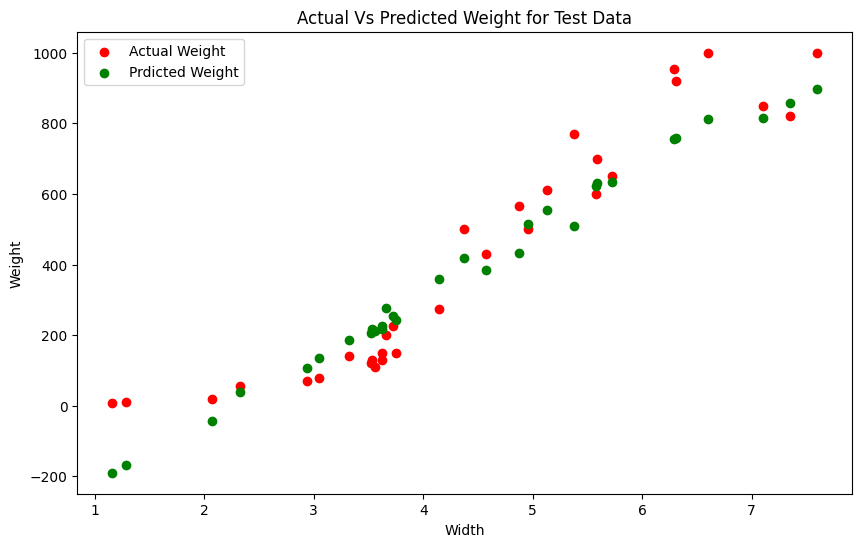

In [29]:
plt.scatter(X_test['Width'], y_test, color='red', label = 'Actual Weight')
plt.scatter(X_test['Width'], model.predict(X_test), color='green', label = 'Prdicted Weight')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title('Actual Vs Predicted Weight for Test Data')
plt.legend()
plt.show()

In [35]:
# Calculate the R^2 score of the model on the test data
r2_score = model.score(X_test, y_test)

# Convert the R^2 score to a percentage
r2_score_percentage = r2_score * 100

# Print the R^2 score as a percentage
print('OLS Model Accuray = {:.2f}%'.format(r2_score_percentage))

OLS Model Accuray = 89.60%


# Using Ridge Regression Model

In [31]:
from sklearn.linear_model import Ridge

# Create an instance of the Ridge regression model
ridge_model = Ridge()

# Fit the Ridge model to the training data
ridge_model.fit(X_train, y_train)


Ridge()

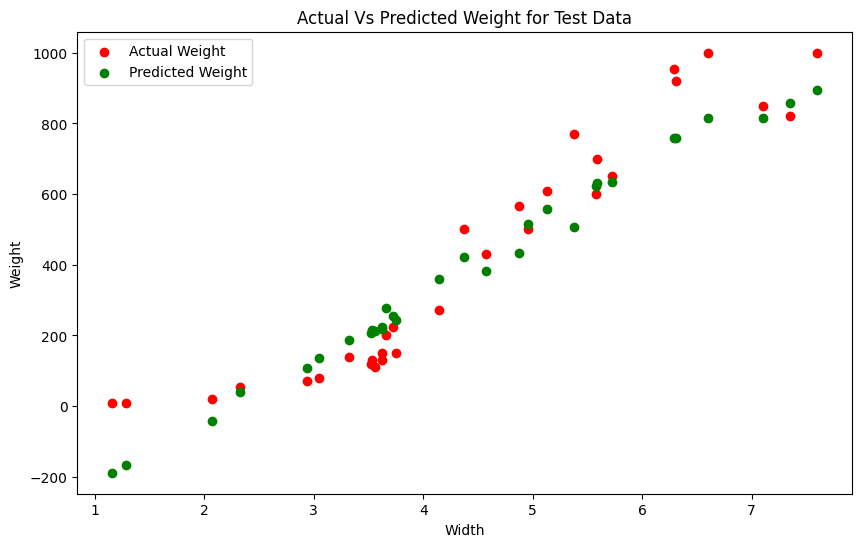

In [32]:
# Create scatter plot for actual weight
plt.scatter(X_test['Width'], y_test, color='red', label='Actual Weight')

# Create scatter plot for predicted weight using the Ridge model
plt.scatter(X_test['Width'], ridge_model.predict(X_test), color='green', label='Predicted Weight')

# Add labels and title
plt.xlabel('Width')
plt.ylabel('Weight')
plt.title('Actual Vs Predicted Weight for Test Data')

# Set custom figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Add legend
plt.legend()

# Show plot
plt.show()

In [34]:
# Calculate the R^2 score of the Ridge model on the test data
ridge_r2_score = ridge_model.score(X_test, y_test)

# Convert the R^2 score to a percentage
ridge_r2_score_percentage = ridge_r2_score * 100

# Print the R^2 score of the Ridge model as a percentage
print('Ridge Regression  score = {:.2f}%'.format(ridge_r2_score_percentage))

Ridge Regression  score = 89.63%


OLS Model Accuracy: 89.60%

Ridge Regression Score: 89.63%

While the difference in performance is minimal, the Ridge Regression model achieved a slightly higher accuracy score. Therefore, in this dataset, the Ridge Regression model can be considered as the better-performing model.

#Hyper-parameter Optimization with Cross-Validation.

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Create an instance of the OLS model
ols_model = LinearRegression()

# Define parameter grid (empty since OLS doesn't have hyperparameters)
param_grid = {}

# Instantiate GridSearchCV
grid_search_ols = GridSearchCV(ols_model, param_grid, cv=5, scoring='r2')

# Fit GridSearchCV to the training data
grid_search_ols.fit(X_train, y_train)

# Get the best R^2 score
best_r2_ols = grid_search_ols.best_score_

# Print the best R^2 score
print("Best R^2 score for OLS model:", best_r2_ols)

Best R^2 score for OLS model: 0.8290802592429678


In [42]:
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to search
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Create a parameter grid
param_grid = {'alpha': alphas}

# Create an instance of the Ridge regression model
ridge_model = Ridge()

# Instantiate GridSearchCV
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='r2')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best value of alpha
best_alpha = grid_search.best_params_['alpha']

# Train the Ridge model with the best alpha
ridge_model_best = Ridge(alpha=best_alpha)
ridge_model_best.fit(X_train, y_train)

# Evaluate the performance of the best Ridge model
ridge_score = ridge_model_best.score(X_test, y_test)

# Print the best  score
print("Best score for Ridge Regression model:", ridge_score)

Best score for Ridge Regression model: 0.8976766439345975


1. The best R^2 score for the OLS (Ordinary Least Squares) model is approximately 0.829.
2. The best R^2 score for the Ridge Regression model is approximately 0.898

The Ridge Regression model achieved a higher R^2 score compared to the OLS model, suggesting that it provides a better fit to the data

# Feature Selection

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

# Create an instance of the Ridge regression model
ridge_model = Ridge()

# Specify the number of features to select
num_features = 5  # Adjust as needed

# Create RFE object
rfe = RFE(estimator=ridge_model, n_features_to_select=num_features)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Print the selected features
print("Selected features:", selected_features)


Selected features: Index(['Height', 'Width'], dtype='object')


# Final Model

In [47]:
from sklearn.linear_model import LinearRegression

# Create an instance of the OLS model with the best hyperparameters
ols_model_best = LinearRegression()

# Fit the OLS model to the training data using selected features
ols_model_best.fit(X_train[selected_features], y_train)

# Calculate the accuracy (R^2 score) for the OLS model
ols_accuracy = ols_model_best.score(X_test[selected_features], y_test)
print("Accuracy (R^2 score) for OLS model:", ols_accuracy)

Accuracy (R^2 score) for OLS model: 0.8960229976573091


In [48]:
from sklearn.linear_model import Ridge

# Create an instance of the Ridge regression model with the best alpha
ridge_model_best = Ridge(alpha=best_alpha)

# Fit the Ridge model to the training data using selected features
ridge_model_best.fit(X_train[selected_features], y_train)

# Calculate the accuracy (R^2 score) for the Ridge Regression model
ridge_accuracy = ridge_model_best.score(X_test[selected_features], y_test)
print("Accuracy (R^2 score) for Ridge Regression model:", ridge_accuracy)

Accuracy (R^2 score) for Ridge Regression model: 0.8976766439345975


#Conclusion

Model Performance:

In the hyperparameter optimization, The models achieved an accuracy of 82.90% and 89.76% respectively for hyperparameter optimization. It was found that the Ridge Regression model outperformed the OLS model, achieving a higher R^2 score, indicating better predictive performance.

Effect of Methods:

Yes, the methods I used did result in a  change in the OLS model. There was a increase of 6% in the accuracy of the OLS model

Learnings and Future Directions:

From this experiment, I've realized the significance of choosing the right methods when building models. Going forward, I plan to explore advanced techniques for tuning parameters and selecting features to make the models even better. I'll also work on understanding the data better so that I can make smarter choices during model development.